# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.985333161412714
4.544908981796359 -0.9860079767861988
4.548909781956391 -0.9866670097407619
4.552910582116423 -0.9873102497276712
4.556911382276455 -0.9879376864509827
4.560912182436487 -0.9885493098677052
4.564912982596519 -0.9891451101879616
4.568913782756551 -0.9897250778751452
4.572914582916583 -0.9902892036460726
4.576915383076615 -0.990837478471132
4.580916183236647 -0.9913698935744278
4.584916983396679 -0.9918864404339214
4.588917783556711 -0.992387110781567
4.592918583716743 -0.9928718966034445
4.5969193838767755 -0.9933407901398877
4.6009201840368075 -0.9937937838856081
4.6049209841968395 -0.9942308705898154
4.6089217843568715 -0.9946520432563335
4.6129225845169035 -0.9950572951437123
4.6169233846769355 -0.995446619765336
4.6209241848369675 -0.9958200108895265
4.6249249849969996 -0.9961774625396435
4.628925785157032 -0.9965189689941796
4.632926585317064 -0.9968445247868526
4.636927385477096 -0.9971541247066926
4.640928185637128 -0.9974477637981256
4.64492898579716 -0.997725

9.001800360072014 0.41047745568510696
9.005801160232046 0.40682596765973383
9.009801960392078 0.40316796782309655
9.01380276055211 0.39950351472653256
9.017803560712142 0.3958326670246728
9.021804360872174 0.3921554834745026
9.025805161032206 0.3884720229344212
9.029805961192238 0.38478234436329983
9.03380676135227 0.38108650681953793
9.037807561512302 0.3773845694601178
9.041808361672334 0.37367659153965754
9.045809161832366 0.369962632409463
9.049809961992398 0.36624275151657737
9.05381076215243 0.3625170084028299
9.057811562312462 0.35878546270388284
9.061812362472494 0.3550481741482767
9.065813162632526 0.3513052025564744
9.069813962792558 0.3475566078399038
9.07381476295259 0.3438024499999983
9.077815563112622 0.3400427891272373
9.081816363272655 0.3362776854001834
9.085817163432687 0.33250719908451964
9.089817963592719 0.3287313905320851
9.09381876375275 0.3249503201799084
9.097819563912783 0.32116404854924047
9.101820364072815 0.317372636244586
9.105821164232847 0.31357614395273

13.418683736747349 0.7528050156942608
13.422684536907381 0.7554324848403178
13.426685337067413 0.7580478622465273
13.430686137227445 0.7606511060501634
13.434686937387477 0.7632421745827149
13.43868773754751 0.7658210263705529
13.442688537707541 0.7683876201355943
13.446689337867573 0.7709419147959624
13.450690138027605 0.7734838694666448
13.454690938187637 0.7760134434601477
13.45869173834767 0.7785305962871469
13.462692538507701 0.7810352876571367
13.466693338667733 0.7835274774790734
13.470694138827765 0.7860071258620185
13.474694938987797 0.7884741931157762
13.47869573914783 0.7909286397515292
13.482696539307861 0.7933704264824705
13.486697339467893 0.7957995142244324
13.490698139627925 0.7982158640965122
13.494698939787957 0.8006194374216942
13.49869973994799 0.8030101957274689
13.502700540108021 0.8053881007464491
13.506701340268053 0.8077531144169822
13.510702140428085 0.8101051988837592
13.514702940588117 0.812444316498421
13.51870374074815 0.8147704298201609
13.522704540908181

17.643528705741147 -0.9342061519316193
17.64752950590118 -0.9327714592412426
17.65153030606121 -0.9313218362559044
17.655531106221243 -0.9298573061788218
17.659531906381275 -0.9283778924518207
17.663532706541307 -0.92688361875496
17.66753350670134 -0.9253745090061534
17.67153430686137 -0.9238505873607856
17.675535107021403 -0.9223118782113268
17.679535907181435 -0.9207584061869408
17.683536707341467 -0.9191901961530924
17.6875375075015 -0.917607273211148
17.69153830766153 -0.9160096626979747
17.695539107821563 -0.9143973901855343
17.699539907981595 -0.9127704814804743
17.703540708141627 -0.9111289626237146
17.70754150830166 -0.9094728598900307
17.71154230846169 -0.9078021997876331
17.715543108621723 -0.9061170090577434
17.719543908781755 -0.9044173146741656
17.723544708941787 -0.902703143842855
17.72754550910182 -0.9009745240014821
17.73154630926185 -0.8992314828189942
17.735547109421884 -0.8974740481951716
17.739547909581916 -0.8957022482601817
17.743548709741948 -0.8939161113741289
1

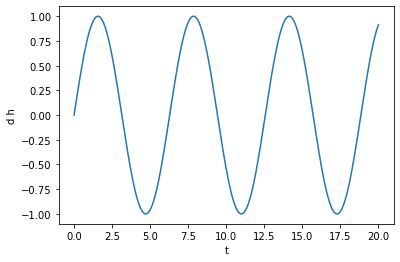

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

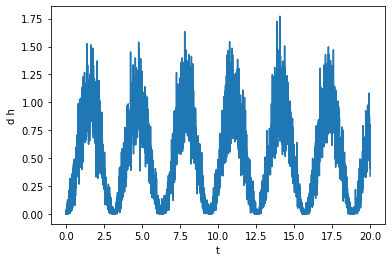

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

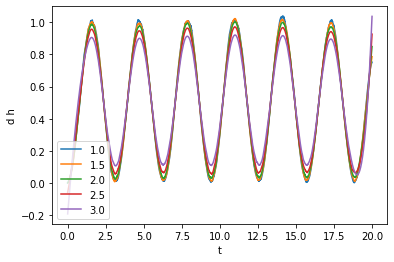

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

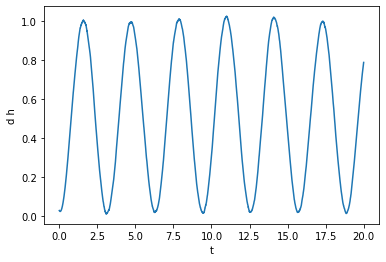

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1942


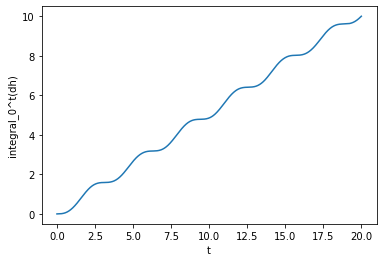

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

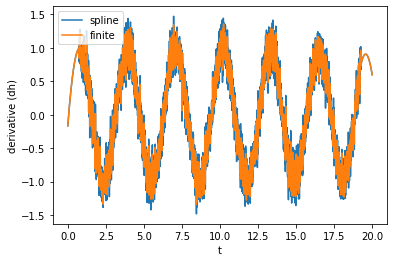

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

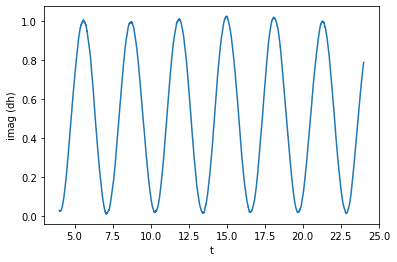

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

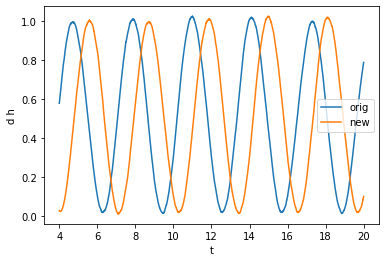

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

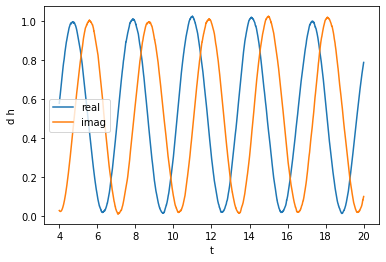

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

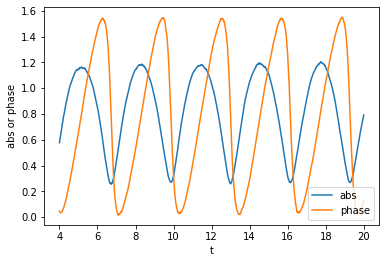

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

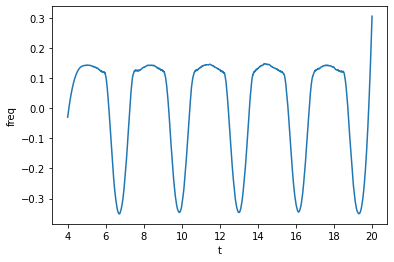

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

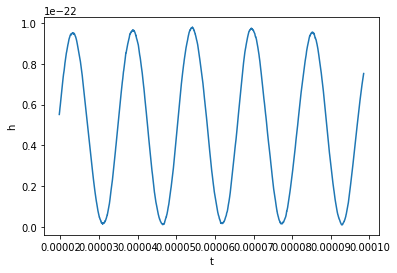

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

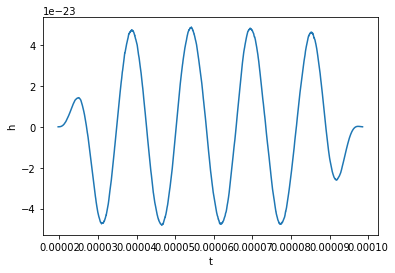

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

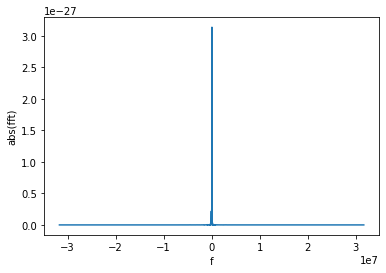

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

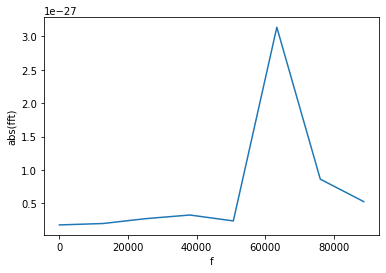

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64198.28


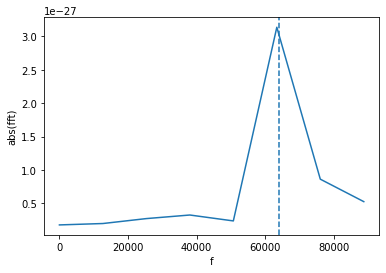

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.138e-27
Maximum with mask 8.622e-28
Length with mask 8
Length after having removed the masked points 7
